# Digital image processing
In this notebook I will use the this powerfull tool called OpenCV.

In [65]:
!pip install nb_black -q

<IPython.core.display.Javascript object>

In [66]:
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [67]:
from matplotlib import pyplot as plt
import cv2
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import pandas as pd

<IPython.core.display.Javascript object>

The file helpers.py at the folder src, is a file with my functions used to produce transformations and hide function to don't dirty the cells.

### How to open a imagem in openCV

In [68]:
img_path = "dataset/test/pos/crop_000009.png"
img = cv2.imread(img_path)

<IPython.core.display.Javascript object>

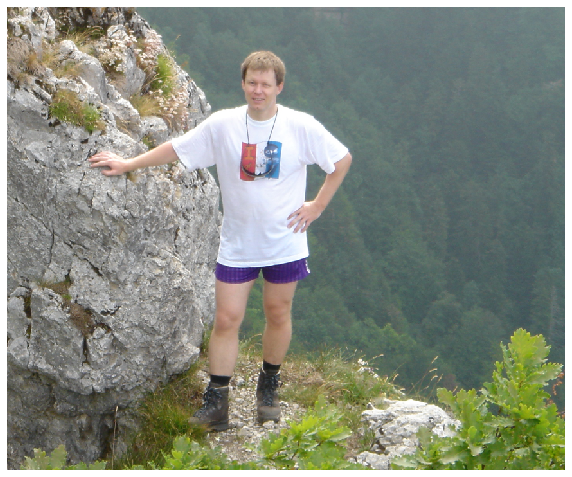

<IPython.core.display.Javascript object>

In [69]:
# How to plot on OS
# cv2.imshow('img',img)

# How to plot on Jupyter
# plt.imshow(img)

# How to plot by function helper
def plot_img_by_obj(img):
    plt.figure(figsize=(10, 10))
    plt.axis("off")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


def plot_img_by_path(path):
    img = cv2.imread(path)
    plot_img_by_obj(img)


plot_img_by_obj(img)

Basic information of an image

In [70]:
def describe_img(img):
    print("Type: {}".format(type(img)))
    shape = img.shape
    print("Width: {}".format(shape[0]))
    print("High: {}".format(shape[1]))
    try:
        print("Dimensions/Colors: {}".format(shape[2]))
    except:
        print("Dimensions/Colors: 1")
    print("Colors Level: {} - {}".format(np.min(img), np.max(img)))


describe_img(img)

Type: <class 'numpy.ndarray'>
Width: 720
High: 868
Dimensions/Colors: 3
Colors Level: 0 - 255


<IPython.core.display.Javascript object>

### Colors to Gray

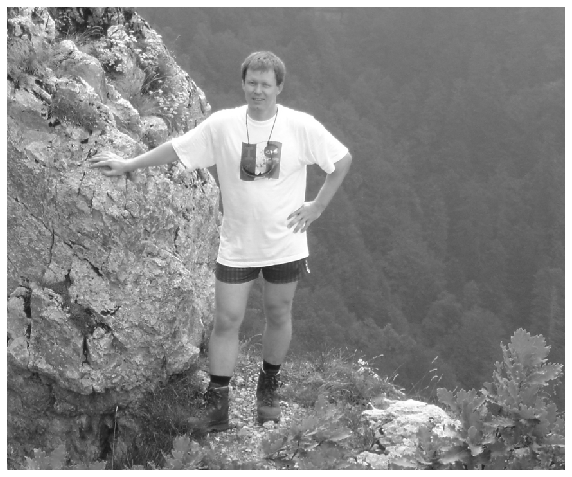

<IPython.core.display.Javascript object>

In [71]:
img_g = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plot_img_by_obj(img_g)

### How to resize image

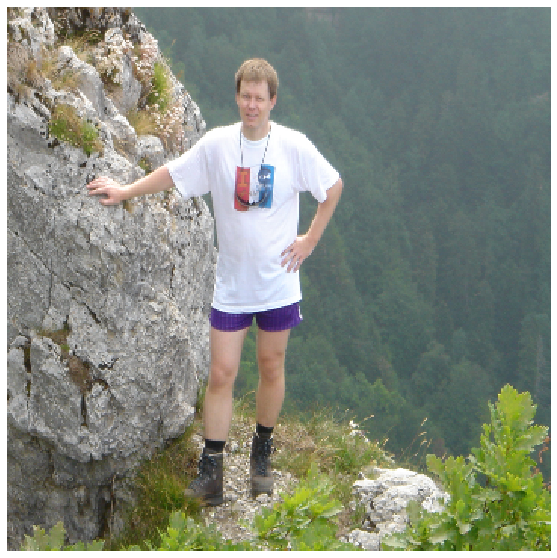

<IPython.core.display.Javascript object>

In [72]:
img_r = cv2.resize(img, (360, 360), interpolation=cv2.INTER_CUBIC)
plot_img_by_obj(img_r)

### Histogram of colors (levels)

In [73]:
def plot_hist(img, title):
    hist = cv2.calcHist([img], [0], None, [256], [0, 256])
    hist = hist.astype(int)
    hist = [h[0] for h in hist]

    df = pd.DataFrame(hist, columns=["freq"])
    df["level"] = df.index

    fig = px.bar(df, x="level", y="freq")
    fig.update_layout(title=title)
    fig.show()


plot_hist(img, "Histogram")

<IPython.core.display.Javascript object>

### How to equalize an image

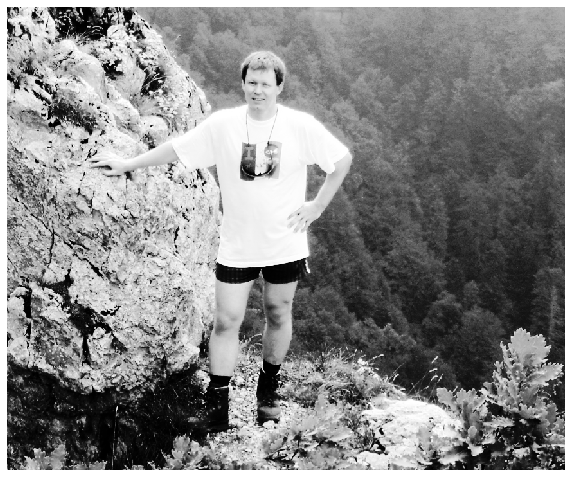

<IPython.core.display.Javascript object>

In [74]:
# A gray
img_g_e = cv2.equalizeHist(img_g)

# A colorful
# imgHSV = cv2.cvtColor(img,cv.CV_BGR2HSV);
# h,s,v = cv2.split(imgHSV);
# h = cv2.equalizeHist(h);
# s = cv2.equalizeHist(s);
# v = cv2.equalizeHist(v);
# hsv = cv2.merge([h,s,v]);
# img_g_e = cv2.cvtColor(hsv,cv.CV_HSV2BGR);

plot_hist(img_g_e, "Histogram")
plot_img_by_obj(img_g_e)

### How to make a binary image

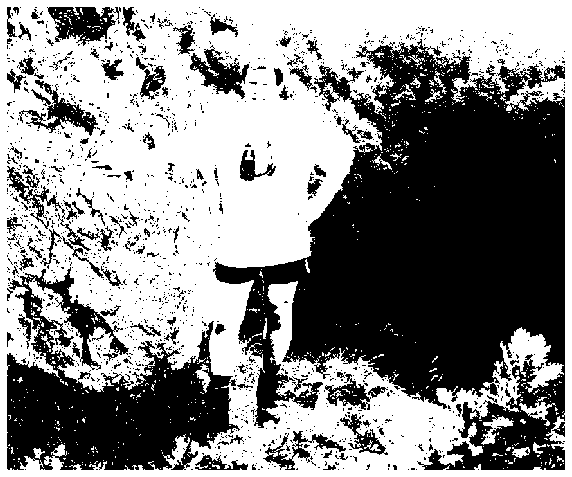

<IPython.core.display.Javascript object>

In [75]:
cell, img_bin = cv2.threshold(img_g_e, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plot_hist(img_bin, "Histogram")
plot_img_by_obj(img_bin)